In [1]:
import sqlutil as sqlutil 
import matplotlib.pyplot as plt
import numpy as np
from lens import Lens
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 



#plotting the motion of one lens.
lensRa, lensDec, id,pmra,pmdec,ref_epoch = sqlutil.get('select ra, dec, source_id,pmra,pmdec,ref_epoch from gaia_dr1.tgas_source where POWER(pmra,2) + POWER(pmdec,2) > 1000000',
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

#backgroud catalogue
#sourceRa, sourceDec = sqlutil.get('select ra, dec from ppmxl.main limit 1000000',
                       #db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

In [4]:


print(len(pmra))
i=5
testlens = Lens(id[i],lensRa[i],lensDec[i],pmra[i],pmdec[i],ref_epoch[i])
#testlens = Lens(1,36.0,26.0,-798.58,10328.12,2013.0)
    
posX = []
posY = []

for i in np.linspace(2009.0,2025.0,num=10):
    pos = testlens.get_eq_coords_at_epoch(i)
    posX.append(pos[0])
    posY.append(pos[1])


box = np.transpose(testlens.get_lens_box())
    

plt.plot(posX,posY,'r--',label='Lens Trajectory')
plt.scatter(box[0],box[1])

boxjX = np.append(box[0],box[0][0])
boxjY = np.append(box[1],box[1][0])

plt.fill_between(boxjX,boxjY,alpha=0.3,label='Background source search window')
plt.xlim(min(box[0]) - 0.0000001,max(box[0]) + 0.0000001)
plt.ylim(min(box[1]) - 0.0000001,max(box[1]) + 0.0000001)
plt.ylabel(r'$\delta$')
plt.xlabel(r'$\alpha\cos\delta$')
plt.legend()
plt.title(r'Lens with $\mu_{\alpha *}$=%.1f and $\mu_{\delta}$=%.1f [mas yr$^{-1}$]'%(pmra[4],pmdec[4]))
plt.savefig('out2.png',dpi=199)

109


In [2]:
lensRa, lensDec, id,pmra,pmdec,ref_epoch = sqlutil.get('select ra, dec, source_id,pmra,pmdec,ref_epoch from gaia_dr1.tgas_source',
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

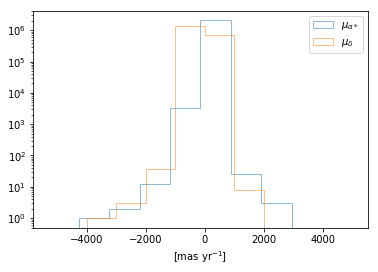

In [9]:
plt.yscale('log',nonposy='clip')
plt.hist(pmra,range=(-5300,5000),histtype='step',alpha=0.5,label=r'$\mu_{\alpha *}$')
plt.hist(pmdec,range=(-5000,5000),histtype='step',alpha=0.5,label=r'$\mu_{\delta}$')
plt.xlabel(r'[mas yr$^{-1}$]')
plt.legend()
plt.show()




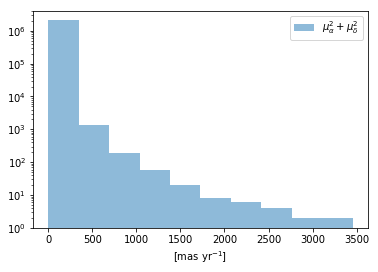

In [11]:
plt.hist(np.sqrt(pmdec**2+pmra**2),alpha=0.5,label=r'$\mu_{\alpha}^{2}+\mu_{\delta}^{2}$')
plt.yscale('log',nonposy='clip')
plt.xlabel(r'[mas yr$^{-1}$]')
plt.legend()
plt.show()